In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [3]:
import pandas as pd                                                  # Importing for panel data analysis
from pandas_profiling import ProfileReport                  # Importing to perform data profiling
pd.set_option('display.max_columns', None)                  # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                  # Unfolding the maximum features width for better clarity
pd.set_option('display.max_rows', None)                       # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)          # Removing restriction over chained assignments operations
import numpy as np
import plotly.graph_objs as go

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16896\3594692447.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport                  # Importing to perform data profiling


# Reading the dataset

In [6]:
df = pd.read_csv(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\EDA\\Automobile_data.csv')  #To read the dataset from the location
print("The dimension of the Automotive dataset: ", df.shape)                                           #To view the dataset in the notebook

The dimension of the Automotive dataset:  (205, 26)


In [7]:
df.head(5)     #To view first 5 values in the dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
df.tail(5)     #To view the last 5 values in the dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [9]:
df.columns     #To view the list of columns in the dataset

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

* It is observed that there are no missing values in any of the columns
* It is found that the 'normalized-losses' is object, but it has to be int
* It is found that the 'bore' and 'stroke' are object, but it has to be int
* It is found that the 'horsepower', 'peak-rpm' and 'price' are object, but it has to be int & float respectively
* The columns mentioned in the points 2, 3, 4 found to have inconsistent values

# Data cleaning

In [11]:
df.make.unique()     #To view the unique values present in the dataset of a particular column. Ex: Here 'make'

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [70]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [12]:
df.isna().sum().sort_values(ascending=False)     #To view the total number of missing values in each column in the dataset

symboling            0
normalized-losses    0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
price                0
dtype: int64

* There are no duplicate values in the dataset

In [13]:
from ydata_profiling import ProfileReport     #Importing to perform the profiling analysis

In [16]:
profile = ProfileReport(df=df, minimal=True)
profile.to_file(output_file= "Pre Profiling Report 19May2023.html")
print("Report exported successfully")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Report exported successfully


In [17]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [18]:
df=df.replace('?','0')     #It was used to convert the '?' present in the columns to 'zero' in the dataset

In [19]:
df['normalized-losses'] = df['normalized-losses'].astype(int)     #This syntax was used to convert the values from object type to int type in the column 'normalized-losses'
print(df.dtypes)

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [20]:
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [22]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


* It is observed that now the inconsistent values are corrected and the column has been converted to the respective type

# Data verification

In [23]:
df.describe()     #The description code shows the numerical analysis of the dataset

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.264780,3.191902,10.142537,25.219512,30.751220
std,1.245307,58.282073,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.535268,0.549625,3.972040,6.542142,6.886443
min,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,0.000000,0.000000,7.000000,13.000000,16.000000
25%,0.000000,77.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.100000,8.600000,19.000000,25.000000
50%,1.000000,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,24.000000,30.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,49.000000,54.000000


* The 1st row count shows the total number of values present in each column and it is a cross verification to make sure the dataset is complete

# Data Analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


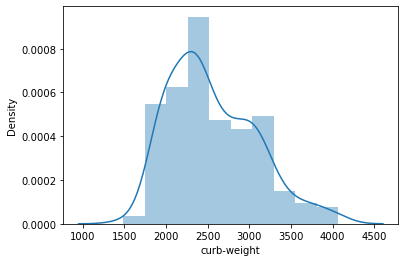

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df["curb-weight"])
plt.show()

In [26]:
df["fuel-type"].value_counts(normalize=True)*100

gas       90.243902
diesel     9.756098
Name: fuel-type, dtype: float64

* It is observed that the 90.24% of the vehicles are petrol or gasoline
* It is observed that only 9.75% of the vehicles belong to the diesel engine catergory

In [28]:
df["make"].value_counts(ascending=False)

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [30]:
df["make"].value_counts(ascending=False).head(5)

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
Name: make, dtype: int64

In [35]:
df_toyota = df[df["make"].isin(["toyota"])]

In [46]:
df_nissan = df[df["make"].isin(["nissan"])]

In [47]:
df_mazda = df[df["make"].isin(["mazda"])]

In [50]:
df_mitsubishi = df[df["make"].isin(["mitsubishi"])]

In [53]:
df_honda = df[df["make"].isin(["honda"])]

In [59]:
df_toyota_fuel = df_toyota["fuel-type"].value_counts(normalize=True) * 100
df_toyota_fuel

gas       90.625
diesel     9.375
Name: fuel-type, dtype: float64

In [56]:
df_nissan_fuel = df_nissan["fuel-type"].value_counts(normalize=True) * 100
df_nissan_fuel

gas       94.444444
diesel     5.555556
Name: fuel-type, dtype: float64

In [57]:
df_mazda_fuel = df_mazda["fuel-type"].value_counts(normalize=True) * 100
df_mazda_fuel

gas       88.235294
diesel    11.764706
Name: fuel-type, dtype: float64

In [58]:
df_mitsubishi_fuel = df_mitsubishi["fuel-type"].value_counts(normalize=True) * 100
df_mitsubishi_fuel

gas    100.0
Name: fuel-type, dtype: float64

In [55]:
df_honda_fuel = df_honda["fuel-type"].value_counts(normalize=True) * 100
df_honda_fuel

gas    100.0
Name: fuel-type, dtype: float64

* Only Toyota, Nissan, Mazda offer the diesel variants from the list of top 5 car sales brands
* Mitsubishi and honda offer 100% gasoline version

In [64]:
df_brandgasoline = df.loc[df['fuel-type'] == 'gas']

In [65]:
df_branddiesel = df.loc[df['fuel-type'] == 'diesel']

In [63]:
df_gasoline_citympg = df_brandgasoline[["make", "city-mpg"]]
df_gasoline_citympg

,make,city-mpg
0,alfa-romero,21
1,alfa-romero,21
2,alfa-romero,19
3,audi,24
4,audi,18
5,audi,19
6,audi,19
7,audi,19
8,audi,17
9,audi,16


In [67]:
df_diesel_citympg = df_branddiesel[["make", "city-mpg"]]
df_diesel_citympg

,make,city-mpg
63,mazda,36
66,mazda,31
67,mercedes-benz,22
68,mercedes-benz,22
69,mercedes-benz,22
70,mercedes-benz,22
90,nissan,45
108,peugot,28
110,peugot,25
112,peugot,28


In [68]:
df_gasoline_citympg.value_counts()

make           city-mpg
nissan         31          9
toyota         24          6
mazda          26          5
toyota         27          5
peugot         19          5
dodge          31          4
mazda          31          4
saab           21          4
honda          30          4
porsche        17          4
honda          27          4
mazda          17          3
toyota         29          3
nissan         17          3
toyota         31          3
nissan         19          3
mitsubishi     23          3
dodge          24          3
mitsubishi     25          3
plymouth       31          3
mitsubishi     19          3
subaru         26          3
volkswagen     27          3
audi           19          3
volvo          23          3
toyota         19          2
nissan         27          2
mitsubishi     31          2
alfa-romero    21          2
mercedes-benz  16          2
plymouth       24          2
subaru         28          2
renault        23          2
saab           19  

In [69]:
df_diesel_citympg.value_counts()

make           city-mpg
mercedes-benz  22          4
peugot         28          3
volkswagen     37          3
peugot         25          2
mazda          31          1
               36          1
nissan         45          1
toyota         30          1
               34          1
               38          1
volkswagen     33          1
volvo          26          1
dtype: int64

Text(0, 0.5, 'Counts of vehicles sold')

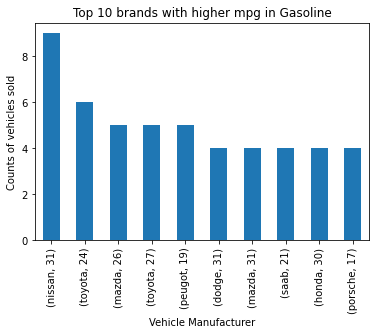

In [77]:
ax = df_gasoline_citympg.value_counts().head(10).plot(kind = 'bar', title ='Top 10 brands with higher mpg in Gasoline')
ax.set_xlabel('Vehicle Manufacturer')
ax.set_ylabel('Counts of vehicles sold')

Text(0, 0.5, 'Counts of vehicles sold')

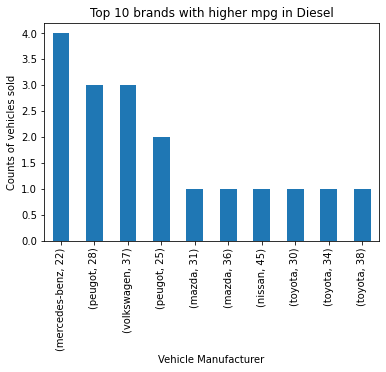

In [78]:
ax = df_diesel_citympg.value_counts().head(10).plot(kind = 'bar', title='Top 10 brands with higher mpg in Diesel')
ax.set_xlabel('Vehicle Manufacturer')
ax.set_ylabel('Counts of vehicles sold')

In [85]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


Text(0, 0.5, 'Distribution')

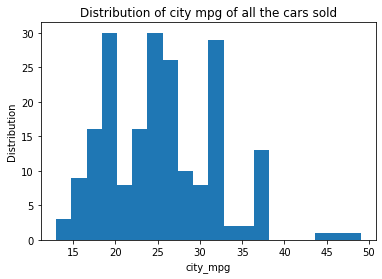

In [112]:
ax = df['city-mpg'].plot(kind='hist', bins=20, title='Distribution of city mpg of all the cars sold')
ax.set_xlabel('city_mpg')
ax.set_ylabel('Distribution')

Text(0, 0.5, 'Distribution')

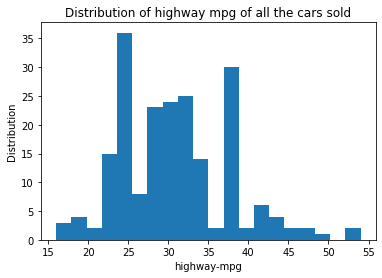

In [149]:
ax = df['highway-mpg'].plot(kind='hist', bins=20, title='Distribution of highway mpg of all the cars sold')
ax.set_xlabel('highway-mpg')
ax.set_ylabel('Distribution')

Text(0, 0.5, 'Distribution')

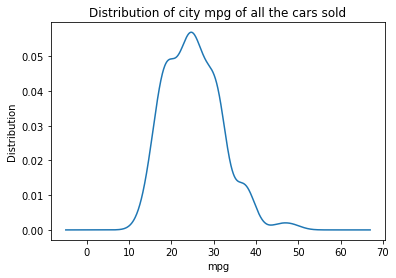

In [90]:
ax = df['city-mpg'].plot(kind='kde', title='Distribution of city mpg of all the cars sold')
ax.set_xlabel('mpg')
ax.set_ylabel('Distribution')

* The above two plots are performed with histogram and kde and it looks like that more number of vehicles are sold in the range of 25 to 30 mpg
* The plots provides us an insight that the customers wish for more mpg in the vehicles

In [91]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


<AxesSubplot:xlabel='curb-weight', ylabel='city-mpg'>

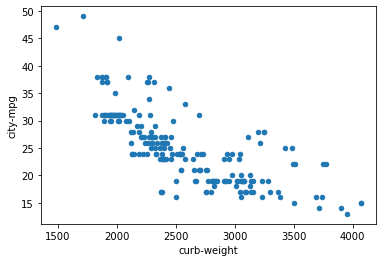

In [92]:
df.plot(kind='scatter', x = 'curb-weight', y = 'city-mpg')

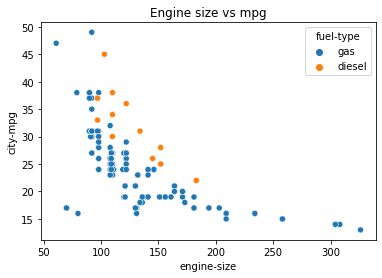

In [104]:
ax = sns.scatterplot(x='engine-size', y='city-mpg', hue = 'fuel-type', data=df)
ax.set_title('Engine size vs mpg')
plt.show()

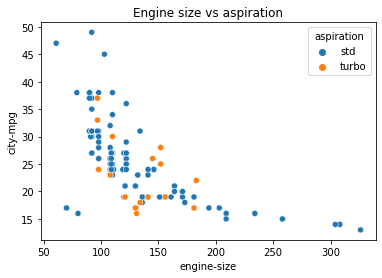

In [150]:
ax = sns.scatterplot(x='engine-size', y='city-mpg', hue = 'aspiration', data=df)
ax.set_title('Engine size vs aspiration')
plt.show()

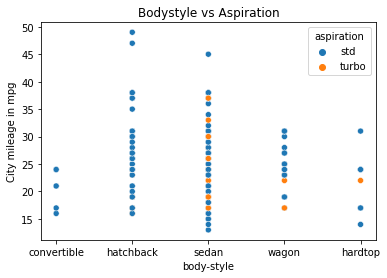

In [119]:
ax = sns.scatterplot(x='body-style', y='city-mpg', hue = 'aspiration', data=df)
ax.set_title('Bodystyle vs Aspiration')
ax.set_ylabel('City mileage in mpg')
plt.show()

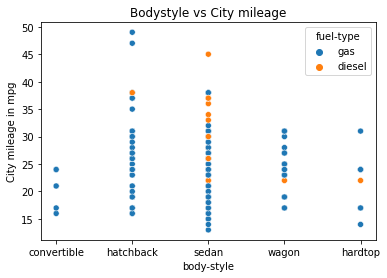

In [116]:
ax = sns.scatterplot(x='body-style', y='city-mpg', hue = 'fuel-type', data=df)
ax.set_title('Bodystyle vs City mileage')
ax.set_ylabel('City mileage in mpg')
plt.show()

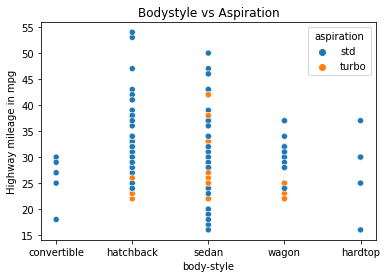

In [120]:
ax = sns.scatterplot(x='body-style', y='highway-mpg', hue = 'aspiration', data=df)
ax.set_title('Bodystyle vs Aspiration')
ax.set_ylabel('Highway mileage in mpg')
plt.show()

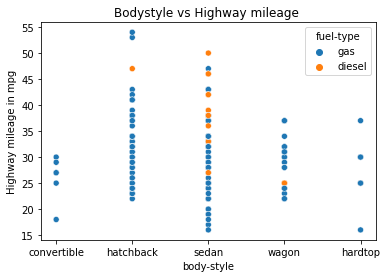

In [117]:
ax = sns.scatterplot(x='body-style', y='highway-mpg', hue = 'fuel-type', data=df)
ax.set_title('Bodystyle vs Highway mileage ')
ax.set_ylabel('Highway mileage in mpg')
plt.show()

In [141]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


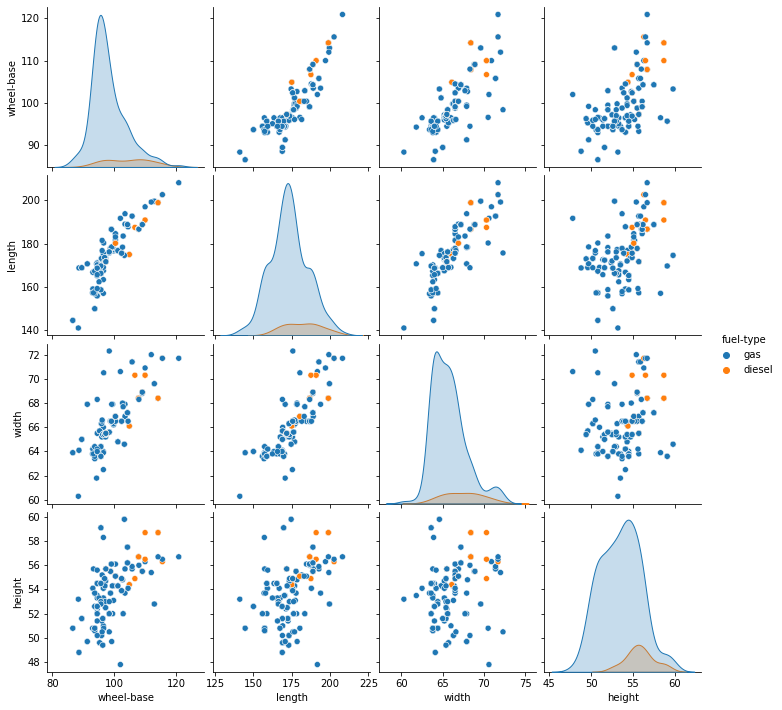

In [143]:
sns.pairplot(df, vars=['wheel-base', 'length', 'width', 'height'], hue='fuel-type')
plt.show()

In [146]:
df_corr = df[['wheel-base', 'length', 'width', 'height']].dropna().corr()
df_corr

,wheel-base,length,width,height
wheel-base,1.000000,0.874587,0.795144,0.589435
length,0.874587,1.000000,0.841118,0.491029
width,0.795144,0.841118,1.000000,0.279210
height,0.589435,0.491029,0.279210,1.000000


<AxesSubplot:>

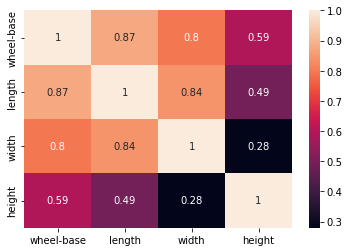

In [148]:
sns.heatmap(df_corr, annot=True)

# Summarization

# Conclusion:
1. It is found that the top 5 automotive brands that did more sales. They are below:
    Toyota
    Nissan
    Mazda
    Mitsubishi
    Honda
2. The gasoline cars contributed to the maximum sales volume of 90.24%
3. The diesel cars contributed to the sales volume of 9.75%
4. Hatchback cars fitted with aspirated engines achieved the highest sales volume in comparison to turbo version
5. Hatchback cars with aspirated engines gave the better mileage in city as well highway
6. The bigger the engine, the lesser is the mileage
7. The maximum number of cars sold had the mileage of 25 to 35 mpg in the city

# Actionable insights:
1. To increase the sales volume with better mileage and to be more environmental friendly, the engine down-sizing is required
2. There is an higher inclination towards the gasoline with aspirated engines
3. To capture the market, more variants in the hatchback bodystyle can be considered